In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Time-Wasters on Social Media.csv", sep=',')
df.head()

Saving Time-Wasters on Social Media.csv to Time-Wasters on Social Media.csv


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [3]:

# Create new features
df['AvgTimePerSession'] = df['Total Time Spent'] / df['Number of Sessions']
df['EngagementPerVideo'] = df['Engagement'] / df['Number of Videos Watched']

# Handle infinity (if division by zero happens)
df.replace([float("inf"), -float("inf")], 0, inplace=True)

# Show new columns
print(df[['Total Time Spent','Number of Sessions','AvgTimePerSession']].head())
print(df[['Engagement','Number of Videos Watched','EngagementPerVideo']].head())


   Total Time Spent  Number of Sessions  AvgTimePerSession
0                80                  17           4.705882
1               228                  14          16.285714
2                30                   6           5.000000
3               101                  19           5.315789
4               136                   6          22.666667
   Engagement  Number of Videos Watched  EngagementPerVideo
0        7867                        22          357.590909
1        5944                        31          191.741935
2        8674                         7         1239.142857
3        2477                        41           60.414634
4        3093                        21          147.285714


In [4]:
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType,AvgTimePerSession,EngagementPerVideo
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data,4.705882,357.590909
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi,16.285714,191.741935
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data,5.000000,1239.142857
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data,5.315789,60.414634
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data,22.666667,147.285714


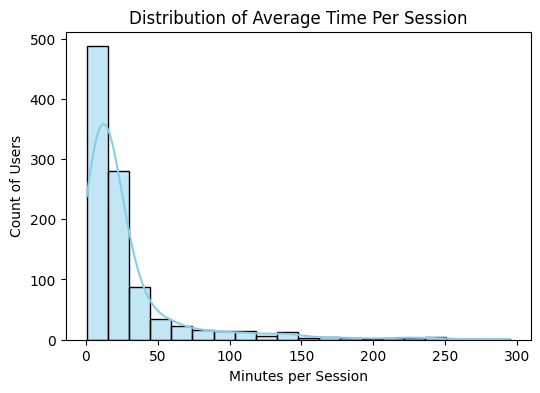

In [5]:
# Histogram of AvgTimePerSession
plt.figure(figsize=(6,4))
sns.histplot(df['AvgTimePerSession'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Average Time Per Session")
plt.xlabel("Minutes per Session")
plt.ylabel("Count of Users")
plt.show()


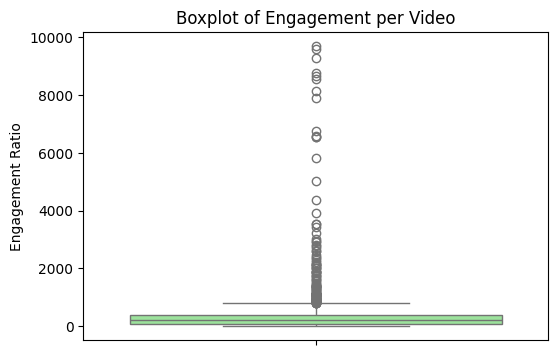

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['EngagementPerVideo'], color="lightgreen")
plt.title("Boxplot of Engagement per Video")
plt.ylabel("Engagement Ratio")
plt.show()

/tmp/ipython-input-3411680644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Addiction Level', y='AvgTimePerSession', data=df, palette='Set2')


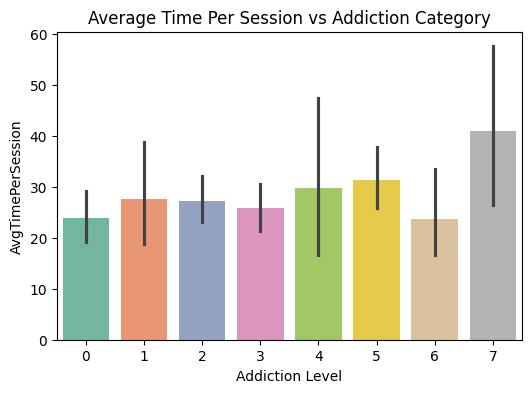

In [8]:
plt.figure(figsize=(6,4))
sns.barplot(x='Addiction Level', y='AvgTimePerSession', data=df, palette='Set2')
plt.title("Average Time Per Session vs Addiction Category")
plt.show()